C:\Users\shams\AppData\Local\Temp\ipykernel_18048\2784093068.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
  signal[k + j] = u + t
C:\Users\shams\AppData\Local\Temp\ipykernel_18048\2784093068.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  signal[k + j + m] = u - t


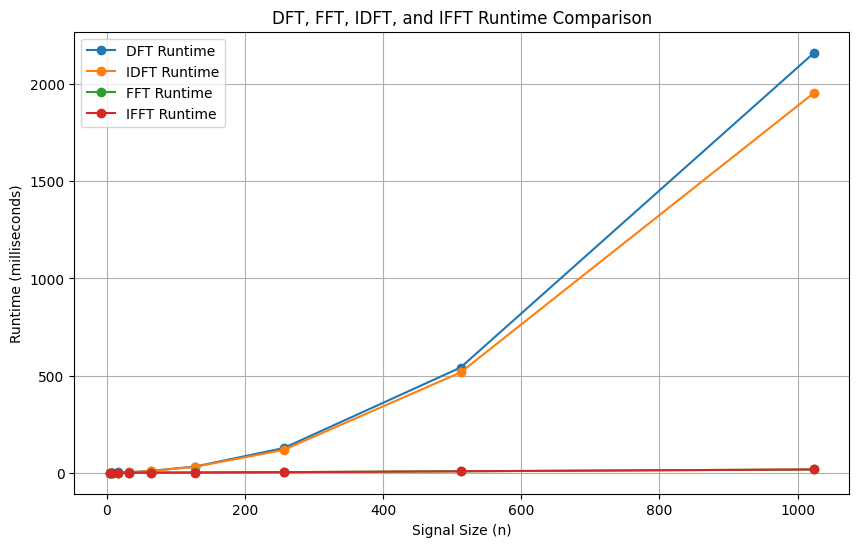

In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Function to generate a random signal of size n
def generate_random_signal(n):
    return np.random.rand(n)

def dft(signal):
    """Compute the Discrete Fourier Transform (DFT) of a signal."""
    N = len(signal)
    dft_output = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            dft_output[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return dft_output

def idft(signal_freq):
    """Compute the Inverse Discrete Fourier Transform (IDFT)."""
    N = len(signal_freq)
    idft_output = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            idft_output[n] += signal_freq[k] * np.exp(2j * np.pi * k * n / N)
    return idft_output / N

# Corrected FFT implementation
def fft(signal):
    """Compute the Fast Fourier Transform (FFT) iteratively."""
    N = len(signal)
    if N % 2 != 0:
        raise ValueError("Signal size must be a power of 2 for this FFT implementation.")
    
    # Bit-reversal permutation
    bit_reversed_indices = np.arange(N, dtype=np.uint32)
    bit_length = int(np.log2(N))
    for i in range(N):
        bit_reversed_indices[i] = int(bin(i)[2:].zfill(bit_length)[::-1], 2)
    
    signal = signal[bit_reversed_indices]
    
    # Iterative FFT
    m = 1
    while m < N:
        step = m * 2
        omega_m = np.exp(-2j * np.pi / step)  # Twiddle factor
        for k in range(0, N, step):
            omega = 1
            for j in range(m):
                t = omega * signal[k + j + m]
                u = signal[k + j]
                signal[k + j] = u + t
                signal[k + j + m] = u - t
                omega *= omega_m
        m = step
    return signal

def ifft(signal_freq):
    """Compute the Inverse FFT (IFFT) of a signal."""
    N = len(signal_freq)
    conjugated = np.conjugate(signal_freq)
    transformed = fft(conjugated)
    return np.conjugate(transformed) / N

# Parameters
signal_sizes = [2**k for k in range(2, 11)]  # Sizes: 4, 8, 16, ..., 1024
dft_runtimes = []
idft_runtimes = []
fft_runtimes = []
ifft_runtimes = []

# Measure and average runtimes over 10 runs
num_runs = 10
for size in signal_sizes:
    dft_times = []
    idft_times = []
    fft_times = []
    ifft_times = []

    for _ in range(num_runs):
        signal = generate_random_signal(size)

        # Measure DFT runtime
        start_time = time.time()
        dft_output = dft(signal)
        dft_times.append(time.time() - start_time)

        # Measure IDFT runtime
        start_time = time.time()
        idft_output = idft(dft_output)
        idft_times.append(time.time() - start_time)

        # Measure FFT runtime
        start_time = time.time()
        fft_output = fft(signal)
        fft_times.append(time.time() - start_time)

        # Measure IFFT runtime
        start_time = time.time()
        ifft_output = ifft(fft_output)
        ifft_times.append(time.time() - start_time)

    # Compute average runtime for each algorithm
    dft_runtimes.append(np.mean(dft_times) * 1000)  # Convert to milliseconds
    idft_runtimes.append(np.mean(idft_times) * 1000)  # Convert to milliseconds
    fft_runtimes.append(np.mean(fft_times) * 1000)  # Convert to milliseconds
    ifft_runtimes.append(np.mean(ifft_times) * 1000)  # Convert to milliseconds

# Plot runtime comparison
plt.figure(figsize=(10, 6))
plt.plot(signal_sizes, dft_runtimes, label="DFT Runtime", marker='o')
plt.plot(signal_sizes, idft_runtimes, label="IDFT Runtime", marker='o')
plt.plot(signal_sizes, fft_runtimes, label="FFT Runtime", marker='o')
plt.plot(signal_sizes, ifft_runtimes, label="IFFT Runtime", marker='o')
plt.xlabel("Signal Size (n)")
plt.ylabel("Runtime (milliseconds)")
plt.title("DFT, FFT, IDFT, and IFFT Runtime Comparison")
plt.legend()
plt.grid(True)
plt.show()
